In [1]:
df <- read.csv("E:/Machine Learning/Datasets/College_Regression.csv")

In [2]:
dim(df)

[1] 387  16

In [3]:
summary(df)

  college_code     division         cutoff         courses      
 Min.   :1002   Min.   :1.000   Min.   : 2.45   Min.   : 1.000  
 1st Qu.:3200   1st Qu.:3.000   1st Qu.:57.92   1st Qu.: 5.000  
 Median :4649   Median :4.000   Median :75.18   Median : 6.000  
 Mean   :4543   Mean   :4.253   Mean   :71.75   Mean   : 7.189  
 3rd Qu.:6268   3rd Qu.:6.000   3rd Qu.:87.98   3rd Qu.: 9.000  
 Max.   :6991   Max.   :6.000   Max.   :99.91   Max.   :41.000  
                                NA's   :10                      
     intake            fees             salary            rating     
 Min.   :   6.3   Min.   :   3750   Min.   : 120000   Min.   :1.000  
 1st Qu.: 240.0   1st Qu.: 240000   1st Qu.: 240000   1st Qu.:3.500  
 Median : 300.0   Median : 308000   Median : 300000   Median :3.800  
 Mean   : 382.0   Mean   : 322662   Mean   : 360634   Mean   :3.666  
 3rd Qu.: 420.0   3rd Qu.: 372500   3rd Qu.: 390000   3rd Qu.:4.000  
 Max.   :2274.0   Max.   :1880000   Max.   :1650000   Max.  

* cutoff, intake, fees, salary, rating, infrastructure, faculty, crowd have missing values
* Also courses, salary, cutoff, intake fees have outliers

# Data Preprocessing

### 1. Dummy variable creation

In [4]:
# Creating dummy variables for categorical variables
library(fastDummies)
df <- dummy_cols(df, select_column="hostel")
df

Thank you for using fastDummies!

To acknowledge our work, please cite the package:

Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.



college_code,division,cutoff,courses,intake,fees,salary,rating,infrastructure,faculty,crowd,hostel,government,autonomous,rank,new_ban,hostel_BOTH,hostel_NONE,hostel_ONE
<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1002,1,96.440,8,300,240000,390000,3.4,3.2,3.5,3.7,BOTH,1,1,301,0,1,0,0
1005,1,61.630,4,720,490000,320000,3.8,3.9,3.9,3.9,BOTH,1,0,301,0,1,0,0
1012,1,86.550,5,720,96000,300000,2.8,2.5,2.5,3.0,BOTH,1,0,301,1,1,0,0
1101,1,93.170,11,300,350000,350000,3.9,4.6,4.0,3.9,BOTH,0,0,301,0,1,0,0
1105,1,88.050,8,480,440000,330000,3.9,4.0,3.9,4.2,NONE,0,1,250,0,0,1,0
1107,1,79.107,6,720,400000,200000,4.4,4.4,4.3,4.6,NONE,0,0,301,1,0,1,0
1108,1,43.040,5,300,310000,300000,3.9,4.0,4.3,3.5,BOTH,0,0,301,0,1,0,0
1114,1,81.550,6,300,320000,370000,4.0,4.4,3.9,4.2,BOTH,0,0,301,0,1,0,0
1116,1,65.260,6,340,420000,220000,3.7,4.0,4.0,3.6,NONE,0,0,301,0,0,1,0


In [5]:
# Removing the columns "hostel" and "hostelNone"
which(colnames(df) == "hostel")
which(colnames(df) == "hostel_NONE")

[1] 12

[1] 18

In [6]:
df <- df[,-18]
df <- df[,-12]

### 2. Missing value imputation

In [7]:
# Missing value imputation
df$cutoff[is.na(df$cutoff)] <- mean(df$cutoff, na.rm=TRUE)
df$intake[is.na(df$intake)] <- mean(df$intake, na.rm=TRUE)
df$fees[is.na(df$fees)] <- mean(df$fees, na.rm=TRUE)
df$salary[is.na(df$salary)] <- mean(df$salary, na.rm=TRUE)
df$rating[is.na(df$rating)] <- mean(df$rating, na.rm=TRUE)
df$infrastructure[is.na(df$infrastructure)] <- mean(df$infrastructure, na.rm=TRUE)
df$faculty[is.na(df$faculty)] <- mean(df$faculty, na.rm=TRUE)
df$crowd[is.na(df$crowd)] <- mean(df$crowd, na.rm=TRUE)

In [8]:
# Rounding off intake variable upto 1 digit
df$intake <- round(df$intake, digits=1)

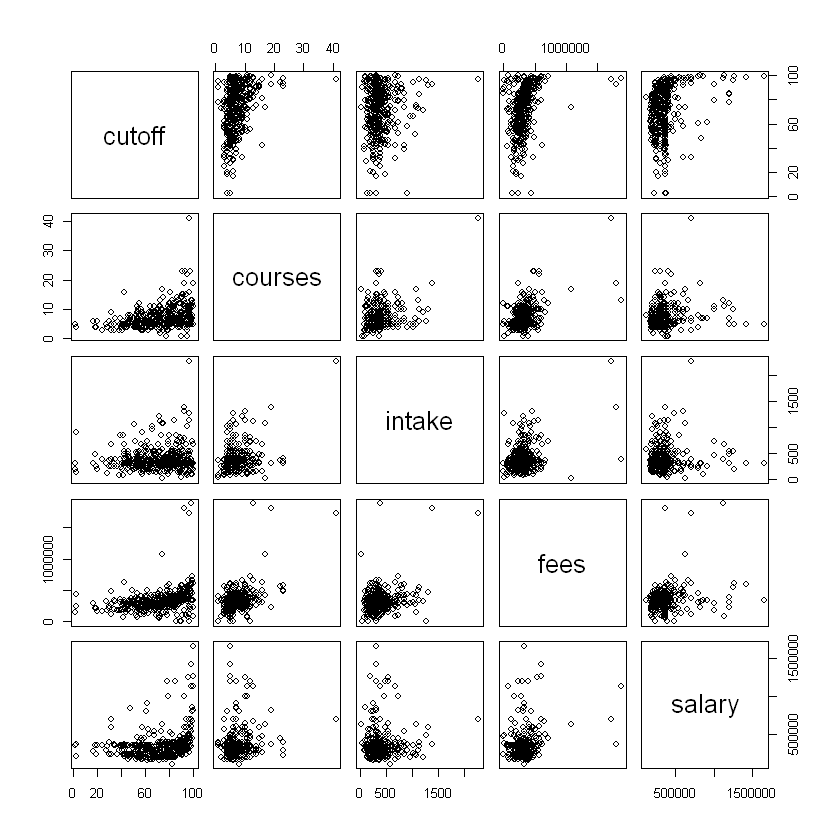

In [9]:
# Scatterplot for outliers
pairs(~cutoff+courses+intake+fees+salary, data=df)

* courses, intake, fees and rank have outliers
* salary has some functional (logarithmic) relationship with cutoff

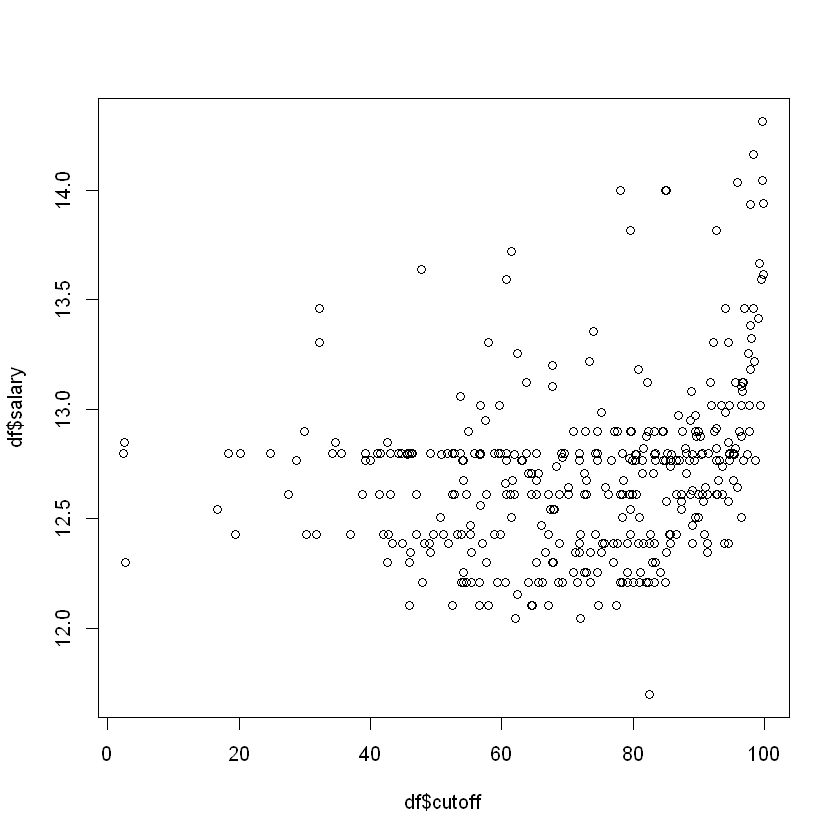

In [13]:
#Converting the log relation to linear relation
df$salary <- log(1+df$salary)
plot(df$cutoff, df$salary)

### 3. Capping and flooring treatment for outliers

In [14]:
# Capping for courses
quantile_value <- quantile(df$courses, 0.75)
UV <- 1.5 * quantile_value
df$courses[df$courses > UV] <- UV
summary(df$courses)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.000   6.000   6.935   9.000  13.500 

In [15]:
# Capping for salary
quantile_value <- quantile(df$salary, 0.75)
UV <- 1.5 * quantile_value
df$salary[df$salary > UV] <- UV
summary(df$salary)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.70   12.43   12.77   12.71   12.80   14.32 

In [16]:
# Flooring for cutoff
quantile_value <- quantile(df$cutoff, 0.25)
LV <- 0.75 * quantile_value
df$cutoff[df$cutoff < LV] <- LV
summary(df$cutoff)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  44.34   59.12   74.51   72.95   87.30   99.91 

In [17]:
# Winsorization for intake
quantile_value <- quantile(df$intake, 0.75)
UV <- 1.5 * quantile_value
df$intake[df$intake > UV] <- UV
summary(df$intake)

quantile_value <- quantile(df$intake, 0.25)
LV <- 0.75 * quantile_value
df$intake[df$intake < LV] <- LV
summary(df$intake)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    6.3   262.5   315.0   353.0   420.0   630.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  196.9   262.5   315.0   360.9   420.0   630.0 

In [18]:
# Winsorization for intake
quantile_value <- quantile(df$intake, 0.75)
UV <- 1.5 * quantile_value
df$intake[df$intake > UV] <- UV
summary(df$intake)

quantile_value <- quantile(df$intake, 0.25)
LV <- 0.75 * quantile_value
df$intake[df$intake < LV] <- LV
summary(df$intake)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  196.9   262.5   315.0   360.9   420.0   630.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  196.9   262.5   315.0   360.9   420.0   630.0 

## Model Evaluation

### Linear Regression

In [20]:
library(LiblineaR)
linear <- lm(cutoff~., data=df)
summary(linear)

package 'LiblineaR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sharath\AppData\Local\Temp\RtmpiA1uQo\downloaded_packages



Call:
lm(formula = cutoff ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.449  -9.740   1.009  10.500  35.224 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.749e+01  2.675e+01  -0.654 0.513739    
college_code   -2.002e-03  3.728e-03  -0.537 0.591548    
division        2.819e+00  3.989e+00   0.707 0.480177    
courses         1.077e+00  2.950e-01   3.649 0.000301 ***
intake         -2.095e-03  5.356e-03  -0.391 0.695955    
fees            1.499e-05  4.486e-06   3.341 0.000919 ***
salary          4.939e+00  1.966e+00   2.511 0.012447 *  
rating          1.525e+00  3.548e+00   0.430 0.667542    
infrastructure -2.706e+00  1.746e+00  -1.550 0.122068    
faculty         2.767e+00  2.321e+00   1.192 0.233841    
crowd           2.834e+00  2.070e+00   1.369 0.171917    
government      1.314e+01  3.313e+00   3.965 8.81e-05 ***
autonomous      8.411e+00  2.479e+00   3.393 0.000765 ***
rank           -6.201e-03  1.847e-02

* 'crowd' and 'new_ban' are more significantly impacting cutoff. 
* 'government' and 'autonomous' also can be considered for analysis.
* 'fees' had some outliers but still it seems to have some relation with cutoff.

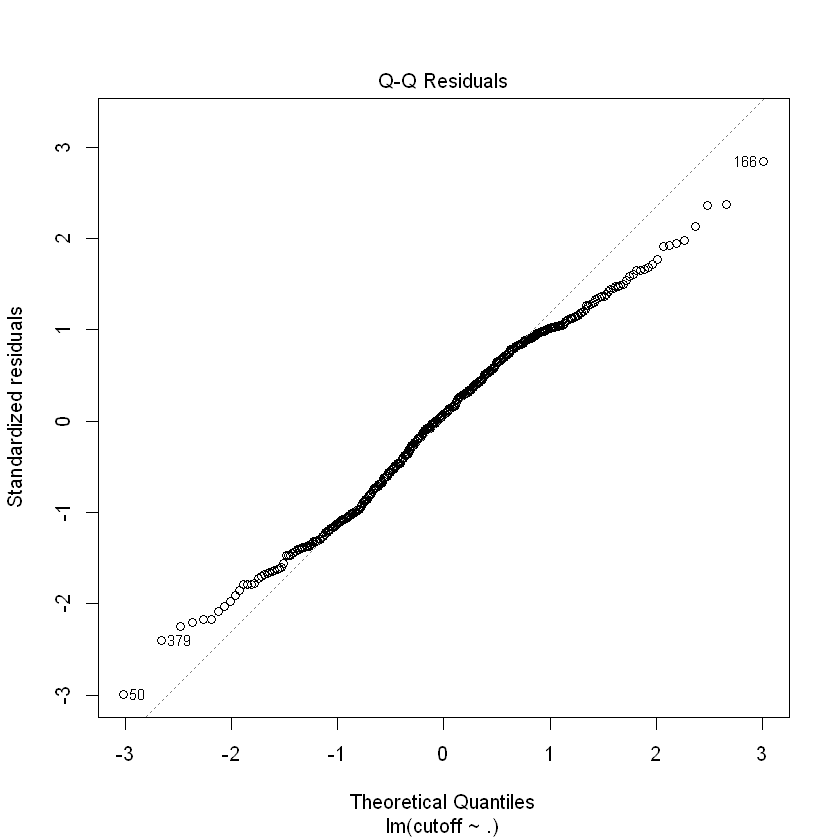

In [22]:
plot(linear, which = 2)

### TEST-TRAIN SPLIT

In [23]:
library(caTools)
set.seed(0)
split <- sample.split(df, SplitRatio=0.7)
train <- subset(df, split==TRUE)
test <- subset(df, split==FALSE)

In [25]:
dim(train)
dim(test)

[1] 251  17

[1] 136  17

### Linear Regression

In [26]:
linear <- lm(cutoff~., data=train)
summary(linear)
test$linear <- predict(linear, test)
View(test)
MSELinear <- mean((test$cutoff-test$linear)^2)


Call:
lm(formula = cutoff ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.316  -8.860   0.386   9.526  32.064 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.705e+01  3.335e+01  -0.811 0.418123    
college_code    1.431e-03  4.520e-03   0.317 0.751765    
division       -8.431e-01  4.836e+00  -0.174 0.861737    
courses         1.119e+00  3.579e-01   3.125 0.002001 ** 
intake         -4.809e-03  6.706e-03  -0.717 0.474058    
fees            1.229e-05  5.238e-06   2.345 0.019840 *  
salary          4.876e+00  2.401e+00   2.031 0.043407 *  
rating         -7.375e+00  4.370e+00  -1.688 0.092821 .  
infrastructure -3.118e-01  2.061e+00  -0.151 0.879886    
faculty         6.286e+00  2.812e+00   2.235 0.026360 *  
crowd           7.216e+00  2.758e+00   2.616 0.009472 ** 
government      1.404e+01  4.128e+00   3.401 0.000789 ***
autonomous      1.020e+01  3.130e+00   3.258 0.001288 ** 
rank            5.160e-03  2.467e

,college_code,division,cutoff,courses,intake,fees,salary,rating,infrastructure,faculty,crowd,government,autonomous,rank,new_ban,hostel_BOTH,hostel_ONE,linear
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1002,1,96.44000,8,300.000,240000.0,12.87391,3.400000,3.200000,3.500000,3.700000,1,1,301,0,1,0,95.25097
5,1105,1,88.05000,8,480.000,440000.0,12.70685,3.900000,4.000000,3.900000,4.200000,0,1,250,0,0,0,83.98529
7,1108,1,44.34375,5,300.000,310000.0,12.61154,3.900000,4.000000,4.300000,3.500000,0,0,301,0,1,0,67.03529
8,1114,1,81.55000,6,300.000,320000.0,12.82126,4.000000,4.400000,3.900000,4.200000,0,0,301,0,1,0,70.98257
14,1122,1,44.34375,5,300.000,200000.0,12.61154,2.200000,3.000000,2.000000,3.500000,0,0,301,1,0,0,57.34506
16,1124,1,49.08000,5,300.000,490000.0,12.34584,3.600000,4.300000,3.600000,3.500000,0,0,301,1,1,0,59.01199
18,1126,1,67.71000,5,300.000,170000.0,13.10216,5.000000,5.000000,5.000000,5.000000,0,0,301,0,1,0,74.53221
22,1130,1,45.98000,6,480.000,180000.0,12.10072,2.200000,4.000000,2.000000,1.000000,0,0,301,1,1,0,36.59204
24,1182,1,59.68000,4,630.000,200000.0,13.01701,4.200000,4.000000,5.000000,5.000000,0,0,301,0,1,0,78.07224


In [27]:
MSELinear

[1] 197.6363

In [29]:
library(leaps)
lm_subset <- regsubsets(cutoff~ .-college_code, data = df, nvmax = 15) # Creates 2^p subsets for p variables. Here there are 15 variables and the regsubset can hold upto 8 variables, so nvmax is used for p>8
summary(lm_subset)

Subset selection object
Call: regsubsets.formula(cutoff ~ . - college_code, data = df, nvmax = 15)
15 Variables  (and intercept)
               Forced in Forced out
division           FALSE      FALSE
courses            FALSE      FALSE
intake             FALSE      FALSE
fees               FALSE      FALSE
salary             FALSE      FALSE
rating             FALSE      FALSE
infrastructure     FALSE      FALSE
faculty            FALSE      FALSE
crowd              FALSE      FALSE
government         FALSE      FALSE
autonomous         FALSE      FALSE
rank               FALSE      FALSE
new_ban            FALSE      FALSE
hostel_BOTH        FALSE      FALSE
hostel_ONE         FALSE      FALSE
1 subsets of each size up to 15
Selection Algorithm: exhaustive
          division courses intake fees salary rating infrastructure faculty
1  ( 1 )  " "      " "     " "    " "  " "    " "    " "            " "    
2  ( 1 )  " "      " "     " "    " "  " "    " "    " "            " "    
3  

The best model is autonomous, followed by new_ban, salary, courses

In [30]:
summary(lm_subset)$adjr2

[1] 0.1996625 0.2671298 0.3075832 0.3391488 0.3631753 0.3818577 0.3956570
 [8] 0.3985146 0.3999024 0.4013720 0.4027879 0.4015884 0.4001945 0.3987643
[15] 0.3971950

In [31]:
which.max(summary(lm_subset)$adjr2)

[1] 11

In [32]:
coef(lm_subset, 11)

(Intercept)       division        courses           fees         salary 
 -2.402757e+01   7.130677e-01   1.082239e+00   1.502842e-05   5.263907e+00 
infrastructure        faculty          crowd     government     autonomous 
 -2.412902e+00   3.287297e+00   3.337308e+00   1.391831e+01   9.121030e+00 
       new_ban    hostel_BOTH 
 -8.859742e+00  -2.168827e+00

We get our best model with these 11 variables. These variables significantly impact cutoff

## Regularization Techniques

In [35]:
library(glmnet)
x <- model.matrix(cutoff~.-college_code, data = df)[, -1]
y <- df$cutoff
grid <- 10^seq(10, -2, length = 30)
grid

Loading required package: Matrix

Loaded glmnet 4.1-8



[1] 1.000000e+10 3.856620e+09 1.487352e+09 5.736153e+08 2.212216e+08
 [6] 8.531679e+07 3.290345e+07 1.268961e+07 4.893901e+06 1.887392e+06
[11] 7.278954e+05 2.807216e+05 1.082637e+05 4.175319e+04 1.610262e+04
[16] 6.210169e+03 2.395027e+03 9.236709e+02 3.562248e+02 1.373824e+02
[21] 5.298317e+01 2.043360e+01 7.880463e+00 3.039195e+00 1.172102e+00
[26] 4.520354e-01 1.743329e-01 6.723358e-02 2.592944e-02 1.000000e-02

### 1. Ridge Regression

          Length Class     Mode   
a0         30    -none-    numeric
beta      450    dgCMatrix S4     
df         30    -none-    numeric
dim         2    -none-    numeric
lambda     30    -none-    numeric
dev.ratio  30    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        5    -none-    call   
nobs        1    -none-    numeric

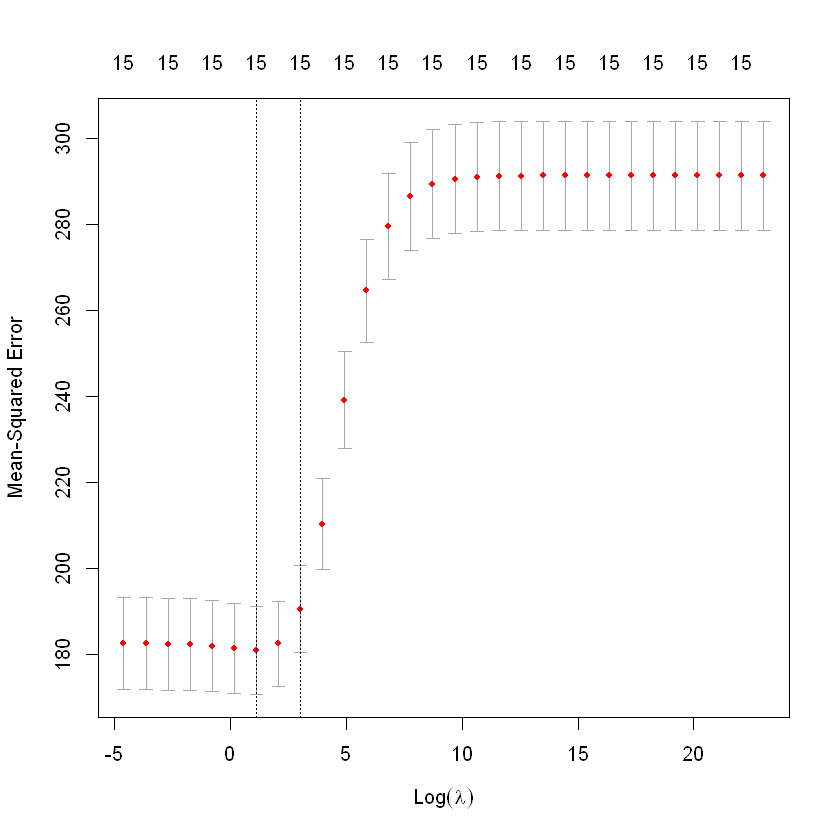

In [36]:
lm_ridge <- glmnet(x, y, alpha = 0, lambda = grid)
summary(lm_ridge)
cv_fit <- cv.glmnet(x, y, alpha = 0, lambda = grid)
plot(cv_fit)

In [37]:
opt_lambda <- cv_fit$lambda.min
opt_lambda

[1] 3.039195

In [38]:
tss <- sum(y - mean(y)^2)
y_a <- predict(lm_ridge, s = opt_lambda, newx = x)
rss <- sum((y - y_a)^2)
rsq <- 1 - rss/tss
rsq

[1] 1.032209

### 2. Lasso Regression

          Length Class     Mode   
a0         30    -none-    numeric
beta      450    dgCMatrix S4     
df         30    -none-    numeric
dim         2    -none-    numeric
lambda     30    -none-    numeric
dev.ratio  30    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        5    -none-    call   
nobs        1    -none-    numeric

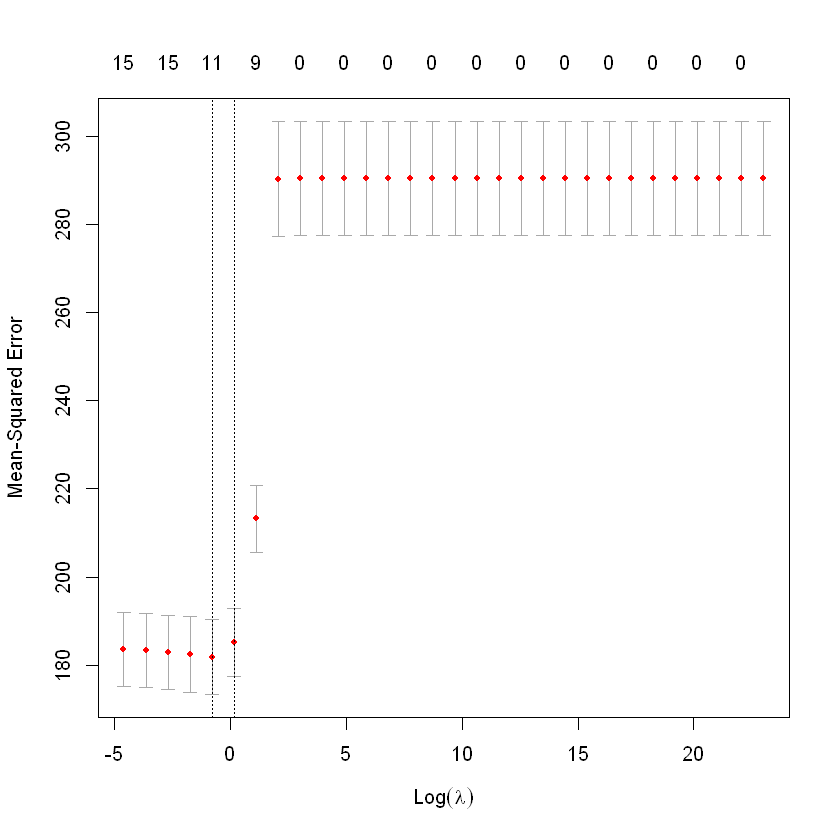

In [39]:
lm_lasso <- glmnet(x, y, alpha = 1, lambda = grid)
summary(lm_lasso)
cv_fit <- cv.glmnet(x, y, alpha = 1, lambda = grid)
plot(cv_fit)

In [40]:
opt_lambda <- cv_fit$lambda.min
opt_lambda

[1] 0.4520354

In [41]:
tss <- sum(y - mean(y)^2)
y_a <- predict(lm_lasso, s = opt_lambda, newx = x)
rss <- sum((y - y_a)^2)
rsq <- 1 - rss/tss
rsq

[1] 1.032472

Here, Ridge Regression is best suited among the two to avoid overfitting and for shrinkage of coefficients towards zero

### Decision Tree


Regression tree:
rpart(formula = cutoff ~ . - college_code, data = train, control = rpart.control(maxdepth = 10))

Variables actually used in tree construction:
 [1] autonomous     courses        crowd          division       faculty       
 [6] fees           infrastructure intake         rank           rating        
[11] salary        

Root node error: 72335/251 = 288.19

n= 251 

         CP nsplit rel error  xerror     xstd
1  0.223238      0   1.00000 1.00341 0.058817
2  0.123613      1   0.77676 0.90145 0.066194
3  0.036390      2   0.65315 0.81939 0.062797
4  0.035734      3   0.61676 0.73716 0.058982
5  0.035188      4   0.58102 0.74346 0.062550
6  0.024599      5   0.54584 0.73241 0.065095
7  0.021179      6   0.52124 0.72749 0.067760
8  0.019829      7   0.50006 0.72664 0.068409
9  0.017260      8   0.48023 0.75142 0.074823
10 0.012416      9   0.46297 0.75251 0.075898
11 0.011018     11   0.43814 0.79084 0.078074
12 0.010765     12   0.42712 0.80079 0.079101
13 0.010000  

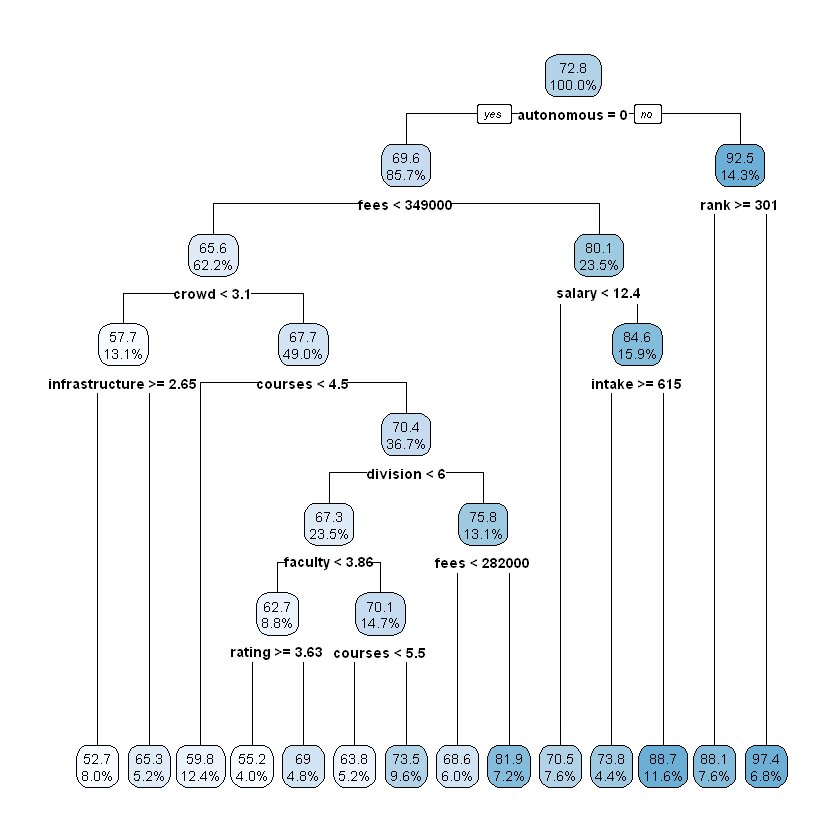

In [42]:
library(rpart)
library(rpart.plot)
regtree <- rpart(cutoff~.-college_code, data=train, control=rpart.control(maxdepth = 10))
rpart.plot(regtree, digits=-3)
printcp(regtree)

Our decision tree can scale upto a maximum depth of 7.

In [44]:
# Predicting values on test set
test$decision <- predict(regtree, test, type="vector")
View(test)

,college_code,division,cutoff,courses,intake,fees,salary,rating,infrastructure,faculty,crowd,government,autonomous,rank,new_ban,hostel_BOTH,hostel_ONE,linear,decision
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1002,1,96.44000,8,300.000,240000.0,12.87391,3.400000,3.200000,3.500000,3.700000,1,1,301,0,1,0,95.25097,88.05211
5,1105,1,88.05000,8,480.000,440000.0,12.70685,3.900000,4.000000,3.900000,4.200000,0,1,250,0,0,0,83.98529,97.36824
7,1108,1,44.34375,5,300.000,310000.0,12.61154,3.900000,4.000000,4.300000,3.500000,0,0,301,0,1,0,67.03529,63.77202
8,1114,1,81.55000,6,300.000,320000.0,12.82126,4.000000,4.400000,3.900000,4.200000,0,0,301,0,1,0,70.98257,73.49375
14,1122,1,44.34375,5,300.000,200000.0,12.61154,2.200000,3.000000,2.000000,3.500000,0,0,301,1,0,0,57.34506,69.04323
16,1124,1,49.08000,5,300.000,490000.0,12.34584,3.600000,4.300000,3.600000,3.500000,0,0,301,1,1,0,59.01199,70.52405
18,1126,1,67.71000,5,300.000,170000.0,13.10216,5.000000,5.000000,5.000000,5.000000,0,0,301,0,1,0,74.53221,63.77202
22,1130,1,45.98000,6,480.000,180000.0,12.10072,2.200000,4.000000,2.000000,1.000000,0,0,301,1,1,0,36.59204,52.71238
24,1182,1,59.68000,4,630.000,200000.0,13.01701,4.200000,4.000000,5.000000,5.000000,0,0,301,0,1,0,78.07224,59.83230


In [45]:
MSEdecision <- mean((test$decision - test$cutoff)^2)
MSEdecision

[1] 201.3251

### Full Tree


Regression tree:
rpart(formula = cutoff ~ . - college_code, data = train, control = rpart.control(cp = 0))

Variables actually used in tree construction:
 [1] autonomous     courses        crowd          division       faculty       
 [6] fees           infrastructure intake         rank           rating        
[11] salary        

Root node error: 72335/251 = 288.19

n= 251 

           CP nsplit rel error  xerror     xstd
1  0.22323757      0   1.00000 1.00702 0.058989
2  0.12361298      1   0.77676 0.91900 0.063660
3  0.03639029      2   0.65315 0.80328 0.057237
4  0.03573425      3   0.61676 0.76081 0.056978
5  0.03518788      4   0.58102 0.76256 0.057996
6  0.02459872      5   0.54584 0.75383 0.062012
7  0.02117882      6   0.52124 0.74177 0.064901
8  0.01982892      7   0.50006 0.75154 0.065503
9  0.01726013      8   0.48023 0.74176 0.065437
10 0.01241569      9   0.46297 0.72422 0.066751
11 0.01101776     11   0.43814 0.73033 0.066521
12 0.01076526     12   0.42712 0.73444 0.0

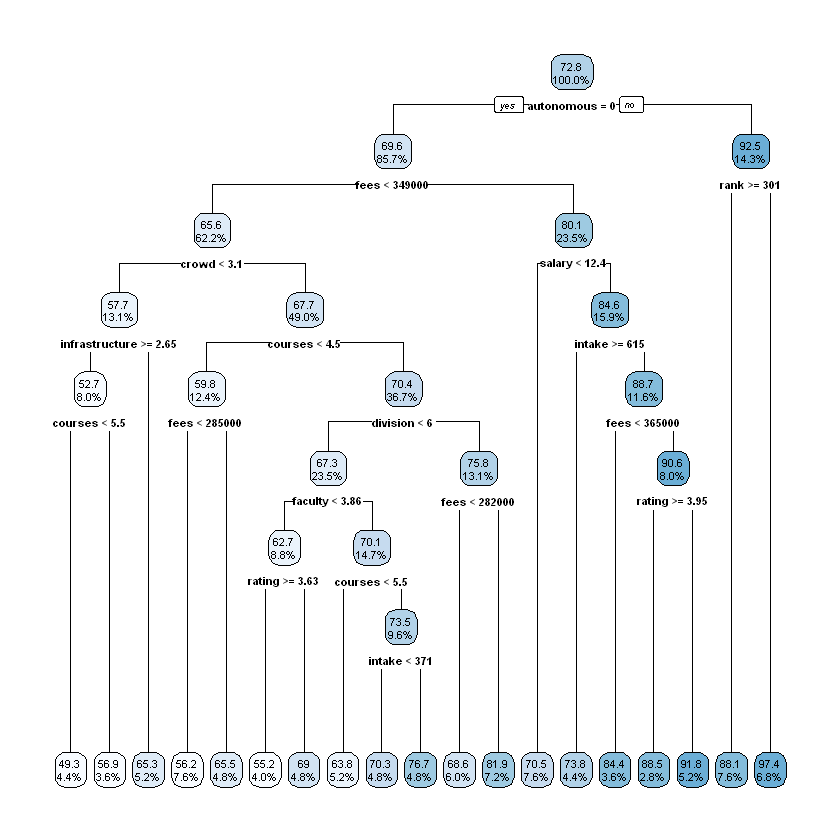

In [46]:
fulltree <- rpart(cutoff~.-college_code, data=train, control=rpart.control(cp=0))
rpart.plot(fulltree, digits=-3) 
printcp(fulltree)

In [47]:
test$fulltree <- predict(fulltree, test, type="vector")
View(test)

,college_code,division,cutoff,courses,intake,fees,salary,rating,infrastructure,faculty,crowd,government,autonomous,rank,new_ban,hostel_BOTH,hostel_ONE,linear,decision,fulltree
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1002,1,96.44000,8,300.000,240000.0,12.87391,3.400000,3.200000,3.500000,3.700000,1,1,301,0,1,0,95.25097,88.05211,88.05211
5,1105,1,88.05000,8,480.000,440000.0,12.70685,3.900000,4.000000,3.900000,4.200000,0,1,250,0,0,0,83.98529,97.36824,97.36824
7,1108,1,44.34375,5,300.000,310000.0,12.61154,3.900000,4.000000,4.300000,3.500000,0,0,301,0,1,0,67.03529,63.77202,63.77202
8,1114,1,81.55000,6,300.000,320000.0,12.82126,4.000000,4.400000,3.900000,4.200000,0,0,301,0,1,0,70.98257,73.49375,70.32917
14,1122,1,44.34375,5,300.000,200000.0,12.61154,2.200000,3.000000,2.000000,3.500000,0,0,301,1,0,0,57.34506,69.04323,69.04323
16,1124,1,49.08000,5,300.000,490000.0,12.34584,3.600000,4.300000,3.600000,3.500000,0,0,301,1,1,0,59.01199,70.52405,70.52405
18,1126,1,67.71000,5,300.000,170000.0,13.10216,5.000000,5.000000,5.000000,5.000000,0,0,301,0,1,0,74.53221,63.77202,63.77202
22,1130,1,45.98000,6,480.000,180000.0,12.10072,2.200000,4.000000,2.000000,1.000000,0,0,301,1,1,0,36.59204,52.71238,56.88917
24,1182,1,59.68000,4,630.000,200000.0,13.01701,4.200000,4.000000,5.000000,5.000000,0,0,301,0,1,0,78.07224,59.83230,56.23467


In [48]:
MSEfull <- mean((test$fulltree - test$cutoff)^2)
MSEfull

[1] 201.1342

### Pruned Tree

[1] 0.01982892

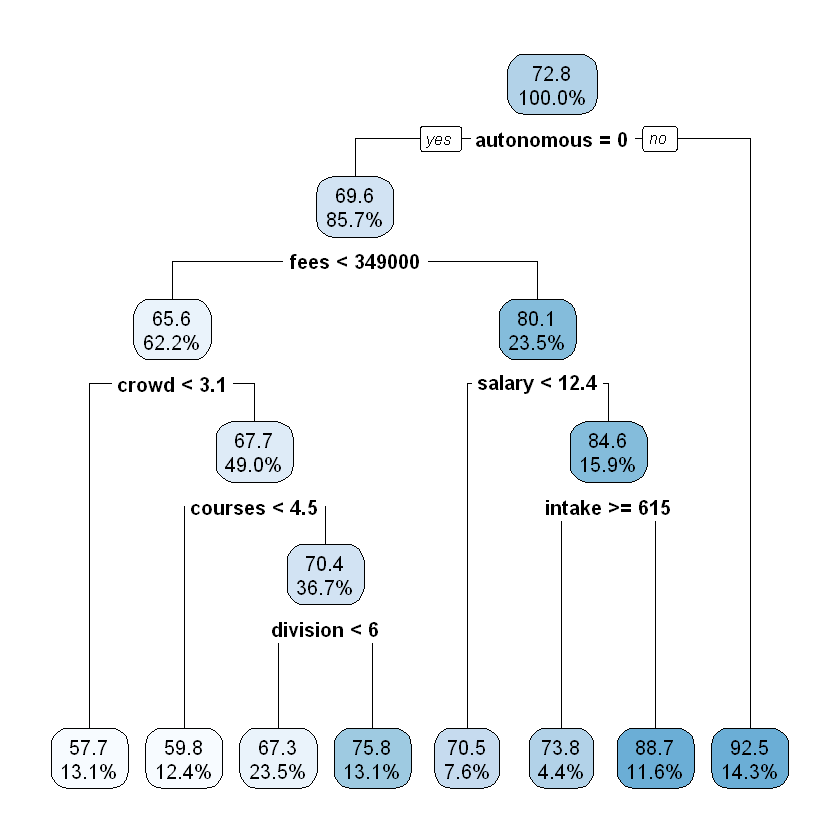

In [49]:
mincp <- regtree$cptable[which.min(regtree$cptable[,"xerror"]), "CP"]
mincp
prunedtree<-prune(fulltree, cp= mincp )
rpart.plot(prunedtree, digits=-3) # FIG 8

In [50]:
test$pruned <- predict(prunedtree, test, type="vector")
View(test)

,college_code,division,cutoff,courses,intake,fees,salary,rating,infrastructure,faculty,⋯,government,autonomous,rank,new_ban,hostel_BOTH,hostel_ONE,linear,decision,fulltree,pruned
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1002,1,96.44000,8,300.000,240000.0,12.87391,3.400000,3.200000,3.500000,⋯,1,1,301,0,1,0,95.25097,88.05211,88.05211,92.45139
5,1105,1,88.05000,8,480.000,440000.0,12.70685,3.900000,4.000000,3.900000,⋯,0,1,250,0,0,0,83.98529,97.36824,97.36824,92.45139
7,1108,1,44.34375,5,300.000,310000.0,12.61154,3.900000,4.000000,4.300000,⋯,0,0,301,0,1,0,67.03529,63.77202,63.77202,67.33875
8,1114,1,81.55000,6,300.000,320000.0,12.82126,4.000000,4.400000,3.900000,⋯,0,0,301,0,1,0,70.98257,73.49375,70.32917,67.33875
14,1122,1,44.34375,5,300.000,200000.0,12.61154,2.200000,3.000000,2.000000,⋯,0,0,301,1,0,0,57.34506,69.04323,69.04323,67.33875
16,1124,1,49.08000,5,300.000,490000.0,12.34584,3.600000,4.300000,3.600000,⋯,0,0,301,1,1,0,59.01199,70.52405,70.52405,70.52405
18,1126,1,67.71000,5,300.000,170000.0,13.10216,5.000000,5.000000,5.000000,⋯,0,0,301,0,1,0,74.53221,63.77202,63.77202,67.33875
22,1130,1,45.98000,6,480.000,180000.0,12.10072,2.200000,4.000000,2.000000,⋯,0,0,301,1,1,0,36.59204,52.71238,56.88917,57.67139
24,1182,1,59.68000,4,630.000,200000.0,13.01701,4.200000,4.000000,5.000000,⋯,0,0,301,0,1,0,78.07224,59.83230,56.23467,59.83230


In [51]:
MSEpruned <- mean((test$pruned - test$cutoff)^2)
MSEpruned

[1] 195.3735

Pruning the full tree helps us to avoid overfitting  by removing the unnecessary nodes and hence reduce the mean squared error. We'll consider the MSE of the pruned tree as the optimum value for our decision tree model

### Bagging

In [53]:
library(randomForest)
set.seed(0)
bagging <- randomForest(cutoff~.-college_code, data=train, mtry=15)
test$bagging <- predict(bagging, test)
View(test)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



,college_code,division,cutoff,courses,intake,fees,salary,rating,infrastructure,faculty,⋯,autonomous,rank,new_ban,hostel_BOTH,hostel_ONE,linear,decision,fulltree,pruned,bagging
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1002,1,96.44000,8,300.000,240000.0,12.87391,3.400000,3.200000,3.500000,⋯,1,301,0,1,0,95.25097,88.05211,88.05211,92.45139,87.14085
5,1105,1,88.05000,8,480.000,440000.0,12.70685,3.900000,4.000000,3.900000,⋯,1,250,0,0,0,83.98529,97.36824,97.36824,92.45139,91.94186
7,1108,1,44.34375,5,300.000,310000.0,12.61154,3.900000,4.000000,4.300000,⋯,0,301,0,1,0,67.03529,63.77202,63.77202,67.33875,70.91037
8,1114,1,81.55000,6,300.000,320000.0,12.82126,4.000000,4.400000,3.900000,⋯,0,301,0,1,0,70.98257,73.49375,70.32917,67.33875,73.05704
14,1122,1,44.34375,5,300.000,200000.0,12.61154,2.200000,3.000000,2.000000,⋯,0,301,1,0,0,57.34506,69.04323,69.04323,67.33875,54.54966
16,1124,1,49.08000,5,300.000,490000.0,12.34584,3.600000,4.300000,3.600000,⋯,0,301,1,1,0,59.01199,70.52405,70.52405,70.52405,69.83709
18,1126,1,67.71000,5,300.000,170000.0,13.10216,5.000000,5.000000,5.000000,⋯,0,301,0,1,0,74.53221,63.77202,63.77202,67.33875,57.85599
22,1130,1,45.98000,6,480.000,180000.0,12.10072,2.200000,4.000000,2.000000,⋯,0,301,1,1,0,36.59204,52.71238,56.88917,57.67139,56.40356
24,1182,1,59.68000,4,630.000,200000.0,13.01701,4.200000,4.000000,5.000000,⋯,0,301,0,1,0,78.07224,59.83230,56.23467,59.83230,61.11015


In [54]:
MSEbagging <- mean((test$bagging - test$cutoff)^2)
MSEbagging

[1] 159.0826

### Random Forest

In [55]:
randomforest <- randomForest(cutoff~.-college_code, data=train, ntree=500)
test$randomforest <- predict(randomforest, test)
View(test)

,college_code,division,cutoff,courses,intake,fees,salary,rating,infrastructure,faculty,⋯,rank,new_ban,hostel_BOTH,hostel_ONE,linear,decision,fulltree,pruned,bagging,randomforest
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1002,1,96.44000,8,300.000,240000.0,12.87391,3.400000,3.200000,3.500000,⋯,301,0,1,0,95.25097,88.05211,88.05211,92.45139,87.14085,82.41035
5,1105,1,88.05000,8,480.000,440000.0,12.70685,3.900000,4.000000,3.900000,⋯,250,0,0,0,83.98529,97.36824,97.36824,92.45139,91.94186,92.13631
7,1108,1,44.34375,5,300.000,310000.0,12.61154,3.900000,4.000000,4.300000,⋯,301,0,1,0,67.03529,63.77202,63.77202,67.33875,70.91037,70.83759
8,1114,1,81.55000,6,300.000,320000.0,12.82126,4.000000,4.400000,3.900000,⋯,301,0,1,0,70.98257,73.49375,70.32917,67.33875,73.05704,73.94291
14,1122,1,44.34375,5,300.000,200000.0,12.61154,2.200000,3.000000,2.000000,⋯,301,1,0,0,57.34506,69.04323,69.04323,67.33875,54.54966,56.92909
16,1124,1,49.08000,5,300.000,490000.0,12.34584,3.600000,4.300000,3.600000,⋯,301,1,1,0,59.01199,70.52405,70.52405,70.52405,69.83709,69.92331
18,1126,1,67.71000,5,300.000,170000.0,13.10216,5.000000,5.000000,5.000000,⋯,301,0,1,0,74.53221,63.77202,63.77202,67.33875,57.85599,60.52810
22,1130,1,45.98000,6,480.000,180000.0,12.10072,2.200000,4.000000,2.000000,⋯,301,1,1,0,36.59204,52.71238,56.88917,57.67139,56.40356,55.63638
24,1182,1,59.68000,4,630.000,200000.0,13.01701,4.200000,4.000000,5.000000,⋯,301,0,1,0,78.07224,59.83230,56.23467,59.83230,61.11015,61.59383


In [56]:
MSErandomforest <- mean((test$randomforest - test$cutoff)^2)
MSErandomforest

[1] 153.8111

### Gradient Boost

In [58]:
library(gbm)
set.seed(0)
boosting <- gbm(cutoff~.-college_code, data=train, distribution="gaussian", n.trees=5000, interaction.depth=4, shrinkage=0.2, verbose = F)
test$boost <- predict(boosting, test, n.trees=5000)
View(test)

Loaded gbm 2.1.8.1



,college_code,division,cutoff,courses,intake,fees,salary,rating,infrastructure,faculty,⋯,new_ban,hostel_BOTH,hostel_ONE,linear,decision,fulltree,pruned,bagging,randomforest,boost
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1002,1,96.44000,8,300.000,240000.0,12.87391,3.400000,3.200000,3.500000,⋯,0,1,0,95.25097,88.05211,88.05211,92.45139,87.14085,82.41035,78.68306
5,1105,1,88.05000,8,480.000,440000.0,12.70685,3.900000,4.000000,3.900000,⋯,0,0,0,83.98529,97.36824,97.36824,92.45139,91.94186,92.13631,98.92230
7,1108,1,44.34375,5,300.000,310000.0,12.61154,3.900000,4.000000,4.300000,⋯,0,1,0,67.03529,63.77202,63.77202,67.33875,70.91037,70.83759,77.19284
8,1114,1,81.55000,6,300.000,320000.0,12.82126,4.000000,4.400000,3.900000,⋯,0,1,0,70.98257,73.49375,70.32917,67.33875,73.05704,73.94291,74.01368
14,1122,1,44.34375,5,300.000,200000.0,12.61154,2.200000,3.000000,2.000000,⋯,1,0,0,57.34506,69.04323,69.04323,67.33875,54.54966,56.92909,48.92507
16,1124,1,49.08000,5,300.000,490000.0,12.34584,3.600000,4.300000,3.600000,⋯,1,1,0,59.01199,70.52405,70.52405,70.52405,69.83709,69.92331,64.97646
18,1126,1,67.71000,5,300.000,170000.0,13.10216,5.000000,5.000000,5.000000,⋯,0,1,0,74.53221,63.77202,63.77202,67.33875,57.85599,60.52810,58.76920
22,1130,1,45.98000,6,480.000,180000.0,12.10072,2.200000,4.000000,2.000000,⋯,1,1,0,36.59204,52.71238,56.88917,57.67139,56.40356,55.63638,49.02708
24,1182,1,59.68000,4,630.000,200000.0,13.01701,4.200000,4.000000,5.000000,⋯,0,1,0,78.07224,59.83230,56.23467,59.83230,61.11015,61.59383,62.58601


In [59]:
MSEboost <- mean((test$boost-test$cutoff)^2)
MSEboost

[1] 223.1197

### Support Vector Machines

In [60]:
library (e1071)
svmfit <- svm(cutoff~.-college_code, data=train , kernel = "linear", cost =0.1, scale = TRUE )
summary (svmfit)


Call:
svm(formula = cutoff ~ . - college_code, data = train, kernel = "linear", 
    cost = 0.1, scale = TRUE)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.06666667 
    epsilon:  0.1 


Number of Support Vectors:  226






In [61]:
## Predicting on test set
test$svm <- predict (svmfit,test)
MSEsvm <- mean((test$svm-test$cutoff)^2)
MSEsvm

[1] 193.0588

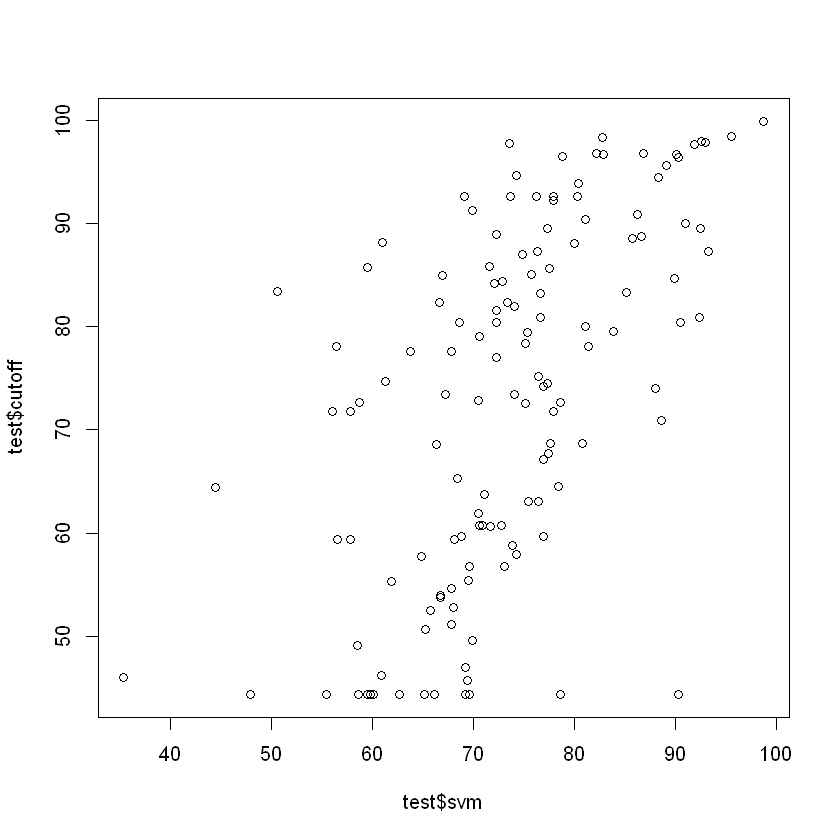

In [62]:
plot(test$svm,test$cutoff)

# Conclusion

The Random Forest Model provides the least error rate of 217.78 on the test set and its predicted values are best suited for predicting the cutoffs